## Modulation Classification
### Dataset : Radio ML 2016.a

In [ ]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import random, sys, keras


import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, MaxPooling1D, Reshape, ZeroPadding2D,LSTM, Conv1DTranspose
from tensorflow.keras.models import Sequential

physical_devices = tf.config.list_physical_devices("GPU")
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [ ]:
# GPU Control
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8820287923282063197
 xla_global_id: -1]

In [ ]:
cd /content/drive/MyDrive/HTVT_BTL/Automatic-Modulation-Classification-with-Deep-Learning/Chinh

/content/drive/MyDrive/HTVT_BTL/Automatic-Modulation-Classification-with-Deep-Learning/Chinh


In [ ]:
!pwd

/content/drive/MyDrive/HTVT_BTL/Automatic-Modulation-Classification-with-Deep-Learning/Chinh


In [ ]:
path = "/content/drive/MyDrive/HTVT_BTL/RML2016.10a_dict.pkl"

df = pd.read_pickle(path)

In [ ]:
df

{('8PSK',
  -20): array([[[-0.00716379, -0.00241632,  0.00063237, ..., -0.00422343,
           0.00362227,  0.00533994],
         [-0.00166505, -0.00144848, -0.01196972, ...,  0.00389698,
          -0.0052103 , -0.0007378 ]],
 
        [[ 0.00645143, -0.00212428, -0.00706135, ..., -0.00565343,
          -0.00104959, -0.00529411],
         [ 0.00329197, -0.00067204, -0.00282152, ...,  0.00315403,
          -0.00091081, -0.00107325]],
 
        [[ 0.00505826,  0.00445021, -0.00706326, ..., -0.00086023,
          -0.00832456, -0.00439183],
         [ 0.00454194,  0.00554406, -0.00336223, ...,  0.01007818,
           0.00437446,  0.00157776]],
 
        ...,
 
        [[-0.00151259, -0.00428863, -0.01558211, ...,  0.00094066,
           0.00665974,  0.00355963],
         [-0.00648331, -0.00097469,  0.00564184, ...,  0.00341373,
          -0.00462972, -0.00684248]],
 
        [[ 0.00229687, -0.00657757,  0.0016513 , ...,  0.00276324,
           0.00307279,  0.00016009],
         [ 0.0085398

In [ ]:
key_arr = list(df.keys())
key_arr

[('QPSK', 2),
 ('PAM4', 8),
 ('AM-DSB', -4),
 ('GFSK', 6),
 ('QAM64', 8),
 ('AM-SSB', 12),
 ('8PSK', 8),
 ('8PSK', 12),
 ('QAM64', -6),
 ('QAM16', 2),
 ('QAM16', -20),
 ('PAM4', -6),
 ('WBFM', -18),
 ('AM-DSB', 16),
 ('CPFSK', 10),
 ('WBFM', 6),
 ('BPSK', 4),
 ('BPSK', -2),
 ('QPSK', -20),
 ('CPFSK', -8),
 ('AM-SSB', 6),
 ('QAM64', -20),
 ('QAM16', 12),
 ('GFSK', -20),
 ('AM-SSB', -12),
 ('CPFSK', 0),
 ('AM-DSB', 6),
 ('BPSK', -16),
 ('QPSK', -6),
 ('8PSK', -12),
 ('CPFSK', -18),
 ('BPSK', -10),
 ('QPSK', 8),
 ('PAM4', 14),
 ('AM-DSB', -10),
 ('GFSK', 12),
 ('QAM64', 2),
 ('WBFM', -4),
 ('AM-SSB', -18),
 ('QAM64', -4),
 ('GFSK', -4),
 ('AM-DSB', 8),
 ('PAM4', -16),
 ('QPSK', -16),
 ('BPSK', 16),
 ('8PSK', -8),
 ('CPFSK', 16),
 ('WBFM', 0),
 ('QPSK', 6),
 ('BPSK', 14),
 ('AM-DSB', -8),
 ('GFSK', -10),
 ('CPFSK', -2),
 ('AM-SSB', 8),
 ('GFSK', 18),
 ('QAM16', 6),
 ('QAM16', -16),
 ('QAM64', 18),
 ('AM-SSB', -2),
 ('CPFSK', 6),
 ('BPSK', 0),
 ('BPSK', -6),
 ('8PSK', -14),
 ('CPFSK', -12),

In [ ]:
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], df.keys())))), [1,0])  
print(snrs)
print(mods)

[-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
['8PSK', 'AM-DSB', 'AM-SSB', 'BPSK', 'CPFSK', 'GFSK', 'PAM4', 'QAM16', 'QAM64', 'QPSK', 'WBFM']


In [ ]:
df[(mod,snr)]

array([[[ 0.00086606,  0.00087306,  0.0009514 , ...,  0.00095035,
          0.00083385,  0.00086427],
        [-0.00782591, -0.0077025 , -0.00772232, ..., -0.00777162,
         -0.00771988, -0.00784837]],

       [[ 0.00111292,  0.00105743,  0.00105138, ...,  0.00112992,
          0.0010435 ,  0.00097616],
        [-0.00782755, -0.00777096, -0.00772526, ..., -0.0078134 ,
         -0.00763502, -0.00767456]],

       [[ 0.0010802 ,  0.00114584,  0.00112479, ...,  0.00119102,
          0.00108454,  0.00115885],
        [-0.00769423, -0.00765154, -0.00775863, ..., -0.00781771,
         -0.00776747, -0.00773164]],

       ...,

       [[ 0.00090855,  0.00091193,  0.00096988, ...,  0.00087493,
          0.00092356,  0.00105166],
        [-0.00778397, -0.00787711, -0.00781963, ..., -0.00772037,
         -0.00776644, -0.00776909]],

       [[ 0.0009345 ,  0.00097915,  0.00097718, ...,  0.000949  ,
          0.0010655 ,  0.00105054],
        [-0.00771043, -0.00773856, -0.00780745, ..., -0.00780

In [ ]:
#modülasyonların ve snr seviyelerinin arraylara atama işlemi 

key_arr = list(df.keys())            # tüm modülasyon tiplerinin tüm snr seviyeleri (220 adet) key_arr'e atandı
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], df.keys())))), [1,0])  
print(snrs)
X = []  
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(df[(mod,snr)])
        for i in range(df[(mod,snr)].shape[0]):  lbl.append(mod)
X = np.vstack(X)

X = np.transpose(X[:,:,:],(0,2,1))

[-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


In [ ]:
print(X)

[[[-0.00716379 -0.00166505]
  [-0.00241632 -0.00144848]
  [ 0.00063237 -0.01196972]
  ...
  [-0.00422343  0.00389698]
  [ 0.00362227 -0.0052103 ]
  [ 0.00533994 -0.0007378 ]]

 [[ 0.00645143  0.00329197]
  [-0.00212428 -0.00067204]
  [-0.00706135 -0.00282152]
  ...
  [-0.00565343  0.00315403]
  [-0.00104959 -0.00091081]
  [-0.00529411 -0.00107325]]

 [[ 0.00505826  0.00454194]
  [ 0.00445021  0.00554406]
  [-0.00706326 -0.00336223]
  ...
  [-0.00086023  0.01007818]
  [-0.00832456  0.00437446]
  [-0.00439183  0.00157776]]

 ...

 [[ 0.00090855 -0.00778397]
  [ 0.00091193 -0.00787711]
  [ 0.00096988 -0.00781963]
  ...
  [ 0.00087493 -0.00772037]
  [ 0.00092356 -0.00776644]
  [ 0.00105166 -0.00776909]]

 [[ 0.0009345  -0.00771043]
  [ 0.00097915 -0.00773856]
  [ 0.00097718 -0.00780745]
  ...
  [ 0.000949   -0.00780556]
  [ 0.0010655  -0.00772785]
  [ 0.00105054 -0.00776188]]

 [[ 0.00091991 -0.00772773]
  [ 0.00093362 -0.00768794]
  [ 0.00092781 -0.00775292]
  ...
  [ 0.0009634  -0.007763

In [ ]:
print(lbl)

['8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK', '8PSK',

# Conclusion of dataset structure:

Dataset has 11 modulation types and 20 SNR values forming 220 different keys
each key has different number of samples

each Modulation type (ex : QPSK,8PSK ...etc) has same number of samples for different SNRs

the 128 dimentions represent values at each micro second of 128 micro seconds so these are samples in time

drivative is the slope of a straight line and measures change of y with change of x so I think it is just the difference between each two consecutive sample values (over change of x which is 1)

for real valued vectors the drivative is called the gradient (there is a function in numpy for that)

numpy's diff does the job also very well (as far as I know) we need only difference between dimentions and divided by change in time which is 1 so only difference is needed


In [ ]:
# print(X.shape)
# print("one sample :")
# print(X[0])

In [ ]:
# with open('/content/drive/MyDrive/HTVT_BTL/RML2016.10a_dict.pkl', 'rb') as f:
#     u = pickle._Unpickler(f)
#     u.encoding = 'latin1'
#     p = u.load()

In [ ]:
# #Kareem
# #all keys
# print("keys:")
# print(p.keys())
# print(p["QPSK",2].shape)
# print("shape of all data:")
# print(X.shape)

In [ ]:


# #Kareem
# #all keys
# print("keys:")
# print(p.keys())
# #print(p["QPSK",2].shape)
# print("shape of all data:")
# print(X.shape)
# #list of all shapes:
# shapes=[]
# snrs=[]
# mod_types=[]
# for x in p.keys():
#   shapes.append(p[x].shape)
#   snrs.append(x[1])
#   mod_types.append(x[0])
# print("same distribution of number of samples as shown:")
# print(sorted(shapes)[0:20])
# print(sorted(shapes)[20:40])
# print(sorted(shapes)[40:60])

# print("same modulation type but different SNRs:")
# print(p["QPSK",-20].shape)
# print(p["QPSK",-18].shape)
# print(p["QPSK",-16].shape)
# print(p["QPSK",-14].shape)
# print(p["QPSK",-12].shape)
# print(p["QPSK",-10].shape)
# print(p["QPSK",-8].shape)
# print(p["QPSK",-6].shape)
# print(p["QPSK",-4].shape)
# print(p["QPSK",-2].shape)
# print(p["QPSK",0].shape)
# print(p["QPSK",2].shape)
# print(p["QPSK",4].shape)
# print(p["QPSK",6].shape)
# print(p["QPSK",8].shape)
# print(p["QPSK",10].shape)
# print(p["QPSK",12].shape)
# print(p["QPSK",14].shape)
# print(p["QPSK",16].shape)
# print(p["QPSK",18].shape)



# print("Again : same modulation type but different SNRs:")
# print(p["CPFSK",-20].shape)
# print(p["CPFSK",-18].shape)
# print(p["CPFSK",-16].shape)
# print(p["CPFSK",-14].shape)
# print(p["CPFSK",-12].shape)
# print(p["CPFSK",-10].shape)
# print(p["CPFSK",-8].shape)
# print(p["CPFSK",-6].shape)
# print(p["CPFSK",-4].shape)
# print(p["CPFSK",-2].shape)
# print(p["CPFSK",0].shape)
# print(p["CPFSK",2].shape)
# print(p["CPFSK",4].shape)
# print(p["CPFSK",6].shape)
# print(p["CPFSK",8].shape)
# print(p["CPFSK",10].shape)
# print(p["CPFSK",12].shape)
# print(p["CPFSK",14].shape)
# print(p["CPFSK",16].shape)
# print(p["CPFSK",18].shape)

# print("same SNR for Different modulation types:")
# print(p["QPSK",2].shape)
# print(p["PAM4",2].shape)
# print(p["AM-DSB",2].shape)
# print(p["QAM64",2].shape)
# print(p["AM-SSB",2].shape)
# print(p["QAM16",2].shape)
# print(p["8PSK",2].shape)
# print("values in keys:")
# print(sorted(set(snrs)))
# print(len(set(snrs)))
# print(set(mod_types))
# print(len(set(mod_types)))
# print("all different shapes:")
# print(sorted(set(shapes)))

In [ ]:
classes = []

# for i in range(len(key_arr)):    # Sınıflar classes list'e aktarıldı.
#     temp_key = key_arr[i][0]
#     if temp_key not in classes:
#         classes.append(temp_key)

classes = mods 
classes = np.array(classes)     #  classes list'i array'e dönüştürüldü.
print(classes)
print(classes.shape[0])
classes = classes.reshape(classes.shape[0], 1)


['8PSK' 'AM-DSB' 'AM-SSB' 'BPSK' 'CPFSK' 'GFSK' 'PAM4' 'QAM16' 'QAM64'
 'QPSK' 'WBFM']
11


In [ ]:
classes

array([['8PSK'],
       ['AM-DSB'],
       ['AM-SSB'],
       ['BPSK'],
       ['CPFSK'],
       ['GFSK'],
       ['PAM4'],
       ['QAM16'],
       ['QAM64'],
       ['QPSK'],
       ['WBFM']], dtype='<U6')

In [ ]:
# Atanan Verinin Train ve Test olarak split edilmesi ( %20 test verisi ayrıldı)
# Etiketleme işlemi olarak 'One Hot Encoder' kullanıldı.

X_train_val, X_test, y_train_val, y_test = train_test_split(X, lbl, test_size = 0.15, random_state = 2000)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.15, random_state = 2000)

enc = OneHotEncoder()
enc.fit(classes)

y_train_ = []
y_train_snr = []

for i in y_train:
    y_train_.append(i[0])
    y_train_snr.append(i[1])


y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)
print(y_train.shape[0])
y_train = y_train.reshape(y_train.shape[0], 1)
print(y_test.shape[0])
y_test = y_test.reshape(y_test.shape[0], 1)
y_val = y_val.reshape(y_val.shape[0], 1)
y_train = enc.transform(y_train).toarray()
y_test = enc.transform(y_test).toarray()
y_val = enc.transform(y_val).toarray()


#Reshape

#X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
#X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

158950
33000


## CLDNN Model

In [ ]:
### CLDNN Model ###

layer_in = keras.layers.Input(shape=(128,2))
layer = keras.layers.Conv1D(filters=64, kernel_size=8, activation='relu')(layer_in)
layer = keras.layers.MaxPool1D(pool_size=2)(layer)
layer = keras.layers.LSTM(64, return_sequences=True,)(layer)
layer = keras.layers.Dropout(0.4)(layer)
layer = keras.layers.LSTM(64, return_sequences=True,)(layer)
layer = keras.layers.Dropout(0.4)(layer)
layer = keras.layers.Flatten()(layer)
layer_out = keras.layers.Dense(len(mods), activation='softmax')(layer)

model_cldnn = keras.models.Model(layer_in, layer_out)


model_cldnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 2)]          0         
                                                                 
 conv1d (Conv1D)             (None, 121, 64)           1088      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 60, 64)           0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 60, 64)            33024     
                                                                 
 dropout (Dropout)           (None, 60, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 64)            33024     
                                                             

In [ ]:
#### Optimizer Stage

###opt = keras.optimizers.adam_v2.Adam(learning_rate = 0.0007, beta_1 = 0.9, beta_2 = 0.99, amsgrad = False)

optimizer = keras.optimizers.adam_v2.Adam(learning_rate=0.0007)
callbacks = [
    keras.callbacks.ModelCheckpoint(
        "cldnn_model.h5", save_best_only=True, monitor="val_loss"),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.4, min_lr=0.000007),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, verbose=1)]

model_cldnn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model_cldnn.fit(X_train, y_train, validation_data=(X_val, y_val), 
                    callbacks = [callbacks],
                    epochs=50, batch_size = 32)



Epoch 1/50
4968/4968 [==============================] - 180s 34ms/step - loss: 1.9019 - accuracy: 0.2886 - val_loss: 1.5975 - val_accuracy: 0.4078 - lr: 7.0000e-04
Epoch 2/50
4968/4968 [==============================] - 164s 33ms/step - loss: 1.4804 - accuracy: 0.4380 - val_loss: 1.3617 - val_accuracy: 0.4739 - lr: 7.0000e-04
Epoch 3/50
4968/4968 [==============================] - 164s 33ms/step - loss: 1.3359 - accuracy: 0.4878 - val_loss: 1.2749 - val_accuracy: 0.5126 - lr: 7.0000e-04
Epoch 4/50
4968/4968 [==============================] - 166s 33ms/step - loss: 1.2791 - accuracy: 0.5096 - val_loss: 1.2304 - val_accuracy: 0.5299 - lr: 7.0000e-04
Epoch 5/50
4968/4968 [==============================] - 162s 33ms/step - loss: 1.2403 - accuracy: 0.5270 - val_loss: 1.2045 - val_accuracy: 0.5388 - lr: 7.0000e-04
Epoch 6/50
4968/4968 [==============================] - 161s 32ms/step - loss: 1.2135 - accuracy: 0.5370 - val_loss: 1.1802 - val_accuracy: 0.5525 - lr: 7.0000e-04
Epoch 7/50
4968/

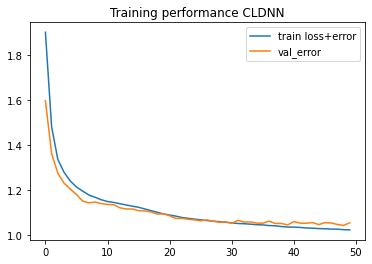

In [ ]:
### Loss graph 

plt.figure()
plt.title('Training performance CLDNN')
plt.plot(history.epoch, history.history['loss'], label='train loss+error')
plt.plot(history.epoch, history.history['val_loss'], label='val_error')
plt.legend()

In [ ]:
model = keras.models.load_model("cldnn_model.h5")

test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test accuracy CLDNN", test_acc)
print("Test loss CLDNN", test_loss)

1032/1032 [==============================] - 13s 12ms/step - loss: 1.0627 - accuracy: 0.6202
Test accuracy CLDNN 0.6201515197753906
Test loss CLDNN 1.0626583099365234


In [ ]:
### Confusion matrix oluşturulması 
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

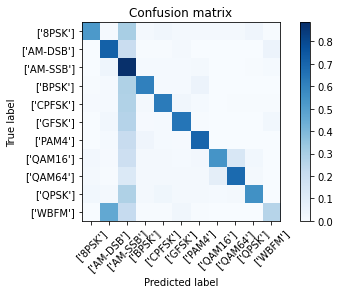

In [ ]:
### Plot confusion matrix
test_Y_hat = model_cldnn.predict(X_test, batch_size=32)
conf = np.zeros([len(classes),len(classes)])
confnorm = np.zeros([len(classes),len(classes)])
for i in range(0,X_test.shape[0]):
    j = list(y_test[i,:]).index(1)
    k = int(np.argmax(test_Y_hat[i,:]))
    conf[j,k] = conf[j,k] + 1
for i in range(0,len(classes)):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
#figure(figsize=(10, 8)
plot_confusion_matrix(confnorm, labels=classes)

In [ ]:
temp = {}
lb = {}

for i in range(20):
    temp[-20 + (i *2)] = []
    lb[-20 + (i *2)] = []
    
for i in range(20):
    for j in range(11):
        arr = df[(classes[j][0] , (-20 + (i *2)))]
        for k in range(len(arr)) : temp [-20 + (i *2 )].append(arr[k])
        for k in range(len(df[classes[j][0], -20 + ( i*2)])): lb[-20 + (i*2)].append(classes[j][0])

Overall Accuracy:  0.096
Overall Accuracy:  0.1015
Overall Accuracy:  0.1055
Overall Accuracy:  0.156
Overall Accuracy:  0.1865
Overall Accuracy:  0.2775
Overall Accuracy:  0.426
Overall Accuracy:  0.602
Overall Accuracy:  0.749
Overall Accuracy:  0.843
Overall Accuracy:  0.885
Overall Accuracy:  0.9135
Overall Accuracy:  0.918
Overall Accuracy:  0.927
Overall Accuracy:  0.918
Overall Accuracy:  0.9225
Overall Accuracy:  0.9275
Overall Accuracy:  0.929
Overall Accuracy:  0.926
Overall Accuracy:  0.925


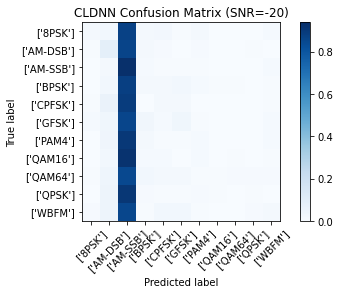

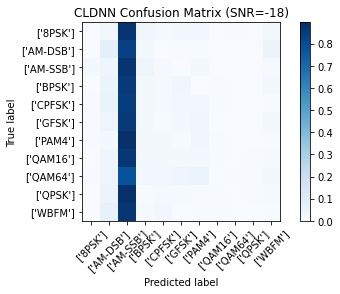

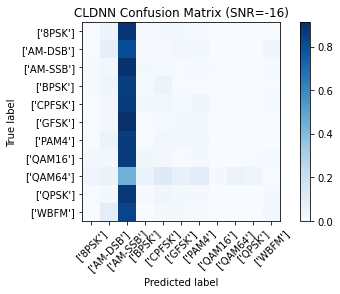

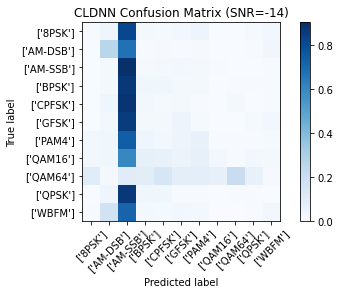

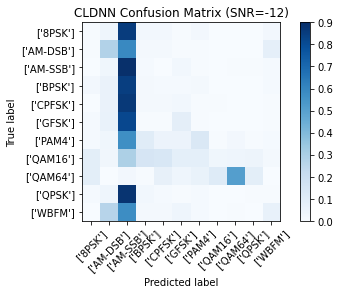

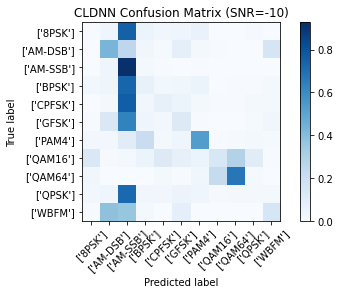

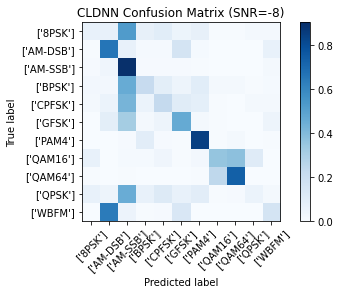

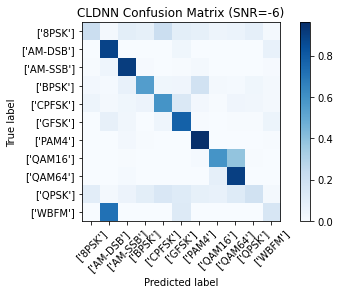

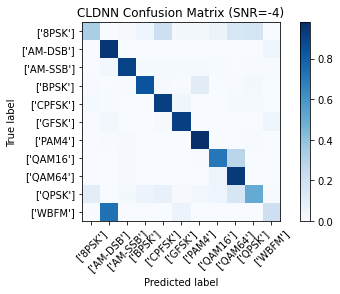

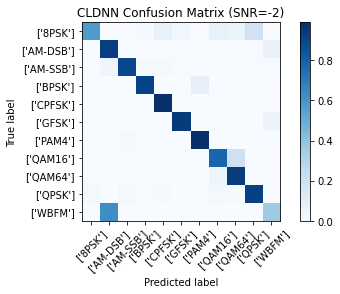

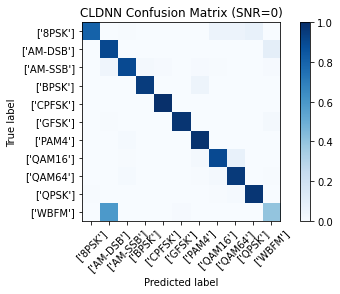

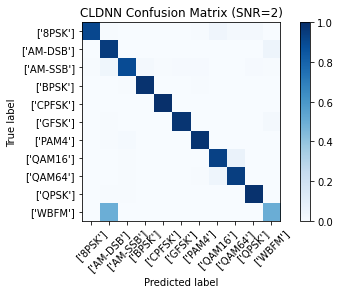

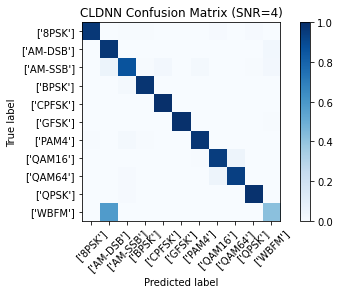

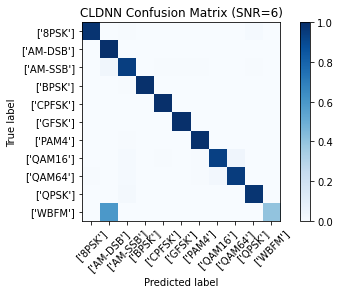

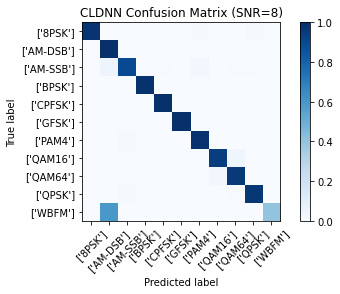

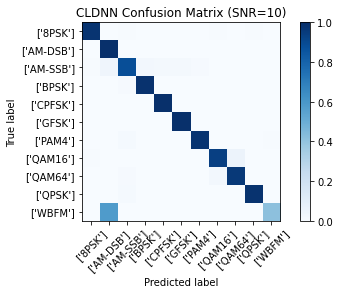

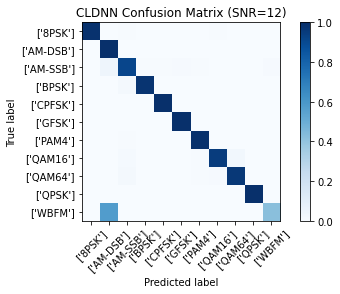

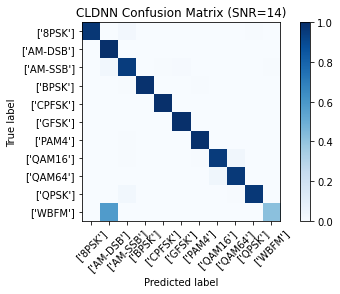

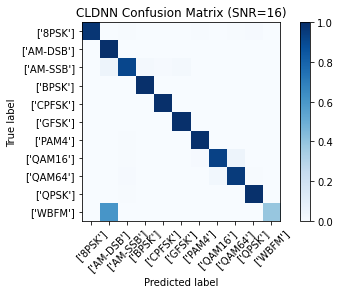

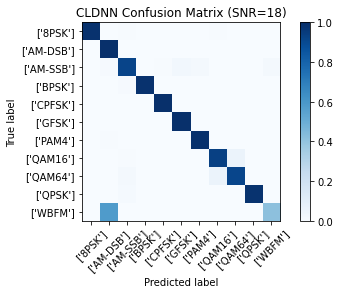

In [ ]:
acc = {}
snr = [-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

for snr in snrs:
    temp_np = np.array(temp[snr])
    lbl_np = np.array(lb[snr])
    
    #temp_np = temp_np.reshape(temp_np.shape[0], temp_np.shape[1], temp_np.shape[2], 1)
    lbl_np = lbl_np.reshape(lbl_np.shape[0], 1)
    
    temp_i = np.random.choice(temp_np.shape[0], 2000, replace = False)
    test_X_i = temp_np[temp_i]
    test_Y_i = lbl_np[temp_i]   
    
    test_Y_i = enc.transform(test_Y_i).toarray()

    test_X_i = np.transpose(test_X_i[:,:,:],(0,2,1))
    # estimate classes
    test_Y_i_hat = model_cldnn.predict(test_X_i)
    conf = np.zeros([len(classes),len(classes)])
    confnorm = np.zeros([len(classes),len(classes)])
    for i in range(0,test_X_i.shape[0]):
        j = (test_Y_i[i,:].tolist()).index(1)
        k = int(np.argmax(test_Y_i_hat[i,:]))
        conf[j,k] = conf[j,k] + 1
    for i in range(0,len(classes)):
        confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
    plt.figure()
    plot_confusion_matrix(confnorm, labels=classes, title="CLDNN Confusion Matrix (SNR=%d)"%(snr))
    
    cor = np.sum(np.diag(conf))
    ncor = np.sum(conf) - cor
    print("Overall Accuracy: ", cor / (cor+ncor))
    acc[snr] = 1.0*cor/(cor+ncor)

##Architectures for training
##CNN

In [ ]:
optimizer = keras.optimizers.adam_v2.Adam(learning_rate=0.0007)

cnn_in = keras.layers.Input(shape=(128,2))
cnn = keras.layers.ZeroPadding1D(padding=4)(cnn_in)
cnn = keras.layers.Conv1D(filters=50, kernel_size=8, activation='relu')(cnn)
cnn = keras.layers.MaxPool1D(pool_size=2)(cnn)
cnn = keras.layers.Conv1D(filters=50, kernel_size=8, activation='relu')(cnn)
cnn = keras.layers.MaxPool1D(pool_size=2)(cnn)
cnn = keras.layers.Conv1D(filters=50, kernel_size=4, activation='relu')(cnn)
cnn = keras.layers.Dropout(rate=0.6)(cnn)
cnn = keras.layers.MaxPool1D(pool_size=2)(cnn)
cnn = keras.layers.Flatten()(cnn)
cnn = keras.layers.Dense(70, activation='selu')(cnn)
cnn_out = keras.layers.Dense(len(mods), activation='softmax')(cnn)

model_cnn = keras.models.Model(cnn_in, cnn_out)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "cnn_model.h5", save_best_only=True, monitor="val_loss"),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.3, patience=3, min_lr=0.00007),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, verbose=1)]

model_cnn.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
model_cnn.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 2)]          0         
                                                                 
 zero_padding1d (ZeroPadding  (None, 136, 2)           0         
 1D)                                                             
                                                                 
 conv1d_1 (Conv1D)           (None, 129, 50)           850       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 64, 50)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 57, 50)            20050     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 28, 50)           0   

In [ ]:
tf.keras.backend.clear_session()
history = model_cnn.fit(X_train, y_train, validation_data=(X_val, y_val), 
                    callbacks = [callbacks],
                    epochs=30, batch_size = 32)

Epoch 1/50
4968/4968 [==============================] - 38s 8ms/step - loss: 1.8135 - accuracy: 0.3181 - val_loss: 1.6415 - val_accuracy: 0.3906 - lr: 7.0000e-04
Epoch 2/50
4968/4968 [==============================] - 37s 8ms/step - loss: 1.5069 - accuracy: 0.4316 - val_loss: 1.3888 - val_accuracy: 0.4760 - lr: 7.0000e-04
Epoch 3/50
4968/4968 [==============================] - 35s 7ms/step - loss: 1.3607 - accuracy: 0.4770 - val_loss: 1.3028 - val_accuracy: 0.5039 - lr: 7.0000e-04
Epoch 4/50
4968/4968 [==============================] - 35s 7ms/step - loss: 1.3146 - accuracy: 0.4946 - val_loss: 1.2846 - val_accuracy: 0.5195 - lr: 7.0000e-04
Epoch 5/50
4968/4968 [==============================] - 34s 7ms/step - loss: 1.2918 - accuracy: 0.5049 - val_loss: 1.3067 - val_accuracy: 0.5084 - lr: 7.0000e-04
Epoch 6/50
4968/4968 [==============================] - 37s 7ms/step - loss: 1.2768 - accuracy: 0.5099 - val_loss: 1.2761 - val_accuracy: 0.5182 - lr: 7.0000e-04
Epoch 7/50
4968/4968 [======

In [ ]:
model = keras.models.load_model("cnn_model.h5")

test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test accuracy CNN", test_acc)
print("Test loss CNN", test_loss)

1032/1032 [==============================] - 5s 4ms/step - loss: 1.1659 - accuracy: 0.5595
Test accuracy CNN 0.5594545602798462
Test loss CNN 1.165874719619751


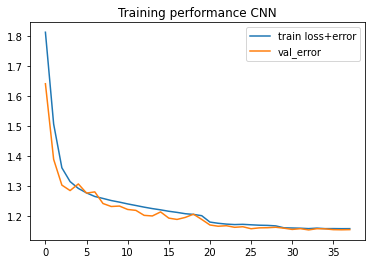

In [ ]:
### Loss graph 

plt.figure()
plt.title('Training performance CNN')
plt.plot(history.epoch, history.history['loss'], label='train loss+error')
plt.plot(history.epoch, history.history['val_loss'], label='val_error')
plt.legend()

In [ ]:
### Confusion matrix oluşturulması 
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

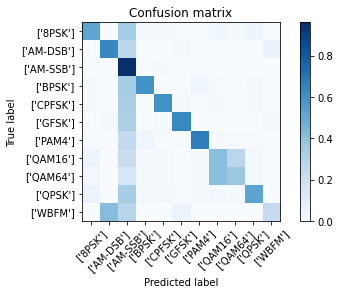

In [ ]:
### Plot confusion matrix
test_Y_hat = model_cnn.predict(X_test, batch_size=32)
conf = np.zeros([len(classes),len(classes)])
confnorm = np.zeros([len(classes),len(classes)])
for i in range(0,X_test.shape[0]):
    j = list(y_test[i,:]).index(1)
    k = int(np.argmax(test_Y_hat[i,:]))
    conf[j,k] = conf[j,k] + 1
for i in range(0,len(classes)):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
#figure(figsize=(10, 8)
plot_confusion_matrix(confnorm, labels=classes)

In [ ]:
temp = {}
lb = {}

for i in range(20):
    temp[-20 + (i *2)] = []
    lb[-20 + (i *2)] = []
    
for i in range(20):
    for j in range(11):
        arr = df[(classes[j][0] , (-20 + (i *2)))]
        for k in range(len(arr)) : temp [-20 + (i *2 )].append(arr[k])
        for k in range(len(df[classes[j][0], -20 + ( i*2)])): lb[-20 + (i*2)].append(classes[j][0])

Overall Accuracy:  0.101
Overall Accuracy:  0.104
Overall Accuracy:  0.095
Overall Accuracy:  0.1135
Overall Accuracy:  0.138
Overall Accuracy:  0.2175
Overall Accuracy:  0.3325
Overall Accuracy:  0.518
Overall Accuracy:  0.6755
Overall Accuracy:  0.7485
Overall Accuracy:  0.8115
Overall Accuracy:  0.8325
Overall Accuracy:  0.8555
Overall Accuracy:  0.862
Overall Accuracy:  0.859
Overall Accuracy:  0.8595
Overall Accuracy:  0.8505
Overall Accuracy:  0.8345
Overall Accuracy:  0.842
Overall Accuracy:  0.841


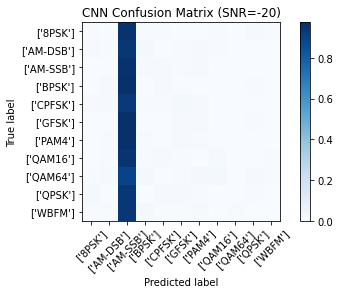

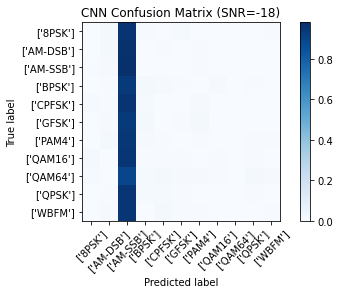

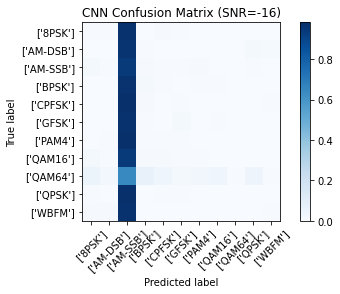

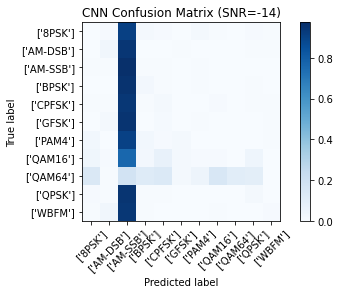

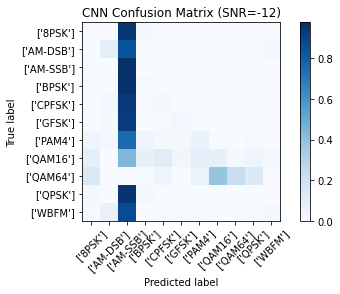

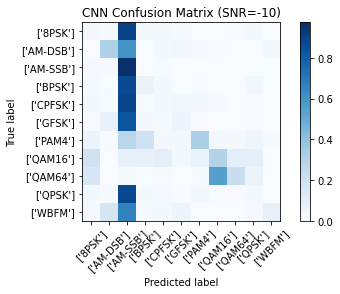

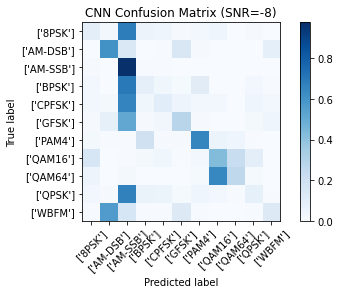

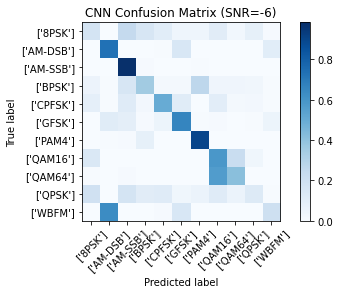

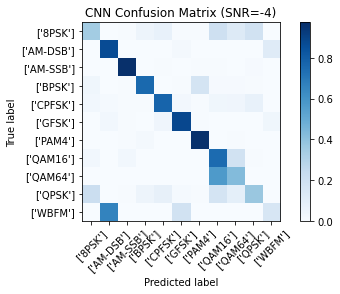

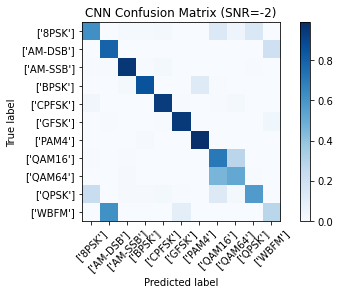

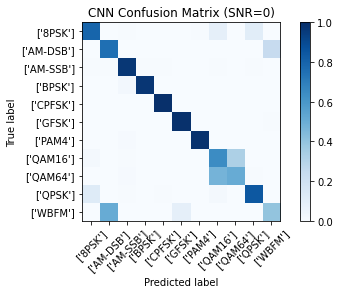

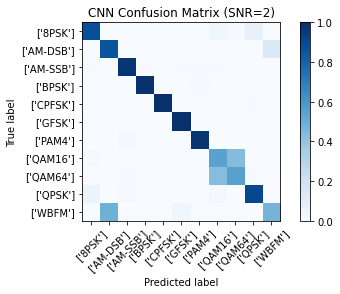

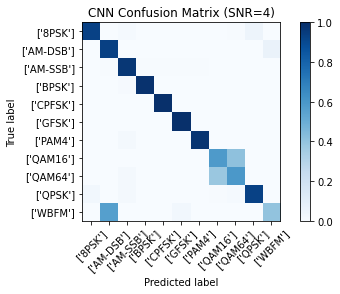

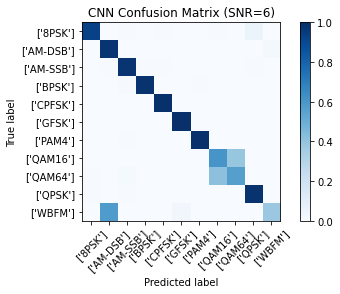

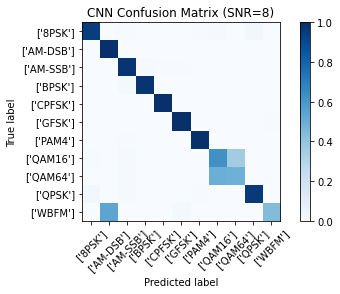

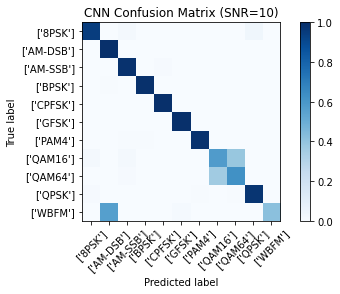

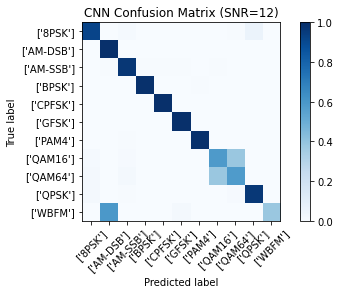

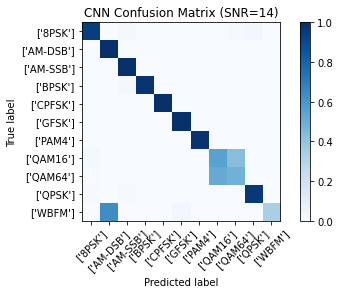

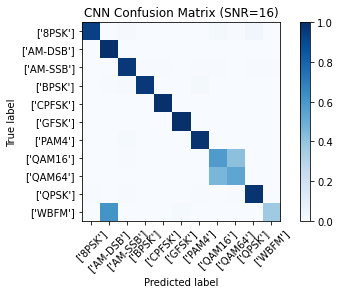

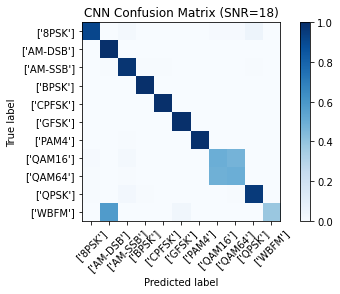

In [ ]:
acc = {}
snr = [-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

for snr in snrs:
    temp_np = np.array(temp[snr])
    lbl_np = np.array(lb[snr])
    
    #temp_np = temp_np.reshape(temp_np.shape[0], temp_np.shape[1], temp_np.shape[2], 1)
    lbl_np = lbl_np.reshape(lbl_np.shape[0], 1)
    
    temp_i = np.random.choice(temp_np.shape[0], 2000, replace = False)
    test_X_i = temp_np[temp_i]
    test_Y_i = lbl_np[temp_i]   
    
    test_Y_i = enc.transform(test_Y_i).toarray()

    test_X_i = np.transpose(test_X_i[:,:,:],(0,2,1))
    # estimate classes
    test_Y_i_hat = model_cnn.predict(test_X_i)
    conf = np.zeros([len(classes),len(classes)])
    confnorm = np.zeros([len(classes),len(classes)])
    for i in range(0,test_X_i.shape[0]):
        j = (test_Y_i[i,:].tolist()).index(1)
        k = int(np.argmax(test_Y_i_hat[i,:]))
        conf[j,k] = conf[j,k] + 1
    for i in range(0,len(classes)):
        confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
    plt.figure()
    plot_confusion_matrix(confnorm, labels=classes, title="CNN Confusion Matrix (SNR=%d)"%(snr))
    
    cor = np.sum(np.diag(conf))
    ncor = np.sum(conf) - cor
    print("Overall Accuracy: ", cor / (cor+ncor))
    acc[snr] = 1.0*cor/(cor+ncor)

##CGDNN

In [ ]:
layer_in = keras.layers.Input(shape=(128,2)) 
layer = keras.layers.Conv1D(filters=80, kernel_size=(12), activation='relu')(layer_in)
layer = keras.layers.MaxPool1D(pool_size=(2))(layer)
layer = keras.layers.GRU(40, return_sequences=True)(layer)
layer = keras.layers.GaussianDropout(0.4)(layer)
layer = keras.layers.GRU(40, return_sequences=True)(layer)
layer = keras.layers.GaussianDropout(0.4)(layer)
layer = keras.layers.Flatten()(layer)
layer_out = keras.layers.Dense(11, activation='softmax')(layer)

model_CGDNN = keras.models.Model(layer_in, layer_out)

optimizer = keras.optimizers.adam_v2.Adam(learning_rate=0.002)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "cgdnn_model.h5", save_best_only=True, monitor="val_loss"),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.4, patience=4, min_lr=0.000007),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, verbose=1)]

model_CGDNN.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
model_CGDNN.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 2)]          0         
                                                                 
 conv1d (Conv1D)             (None, 117, 80)           2000      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 58, 80)           0         
 )                                                               
                                                                 
 gru (GRU)                   (None, 58, 40)            14640     
                                                                 
 gaussian_dropout (GaussianD  (None, 58, 40)           0         
 ropout)                                                         
                                                                 
 gru_1 (GRU)                 (None, 58, 40)            9840  

In [ ]:
tf.keras.backend.clear_session()
history = model_CGDNN.fit(X_train, y_train, batch_size=32, epochs=50, verbose=2, validation_data= (X_val, y_val), callbacks=callbacks)


Epoch 1/50
4968/4968 - 125s - loss: 1.7101 - accuracy: 0.3604 - val_loss: 1.3861 - val_accuracy: 0.4749 - lr: 0.0020 - 125s/epoch - 25ms/step
Epoch 2/50
4968/4968 - 121s - loss: 1.3542 - accuracy: 0.4862 - val_loss: 1.2612 - val_accuracy: 0.5210 - lr: 0.0020 - 121s/epoch - 24ms/step
Epoch 3/50
4968/4968 - 120s - loss: 1.2723 - accuracy: 0.5161 - val_loss: 1.2073 - val_accuracy: 0.5437 - lr: 0.0020 - 120s/epoch - 24ms/step
Epoch 4/50
4968/4968 - 120s - loss: 1.2360 - accuracy: 0.5320 - val_loss: 1.2022 - val_accuracy: 0.5439 - lr: 0.0020 - 120s/epoch - 24ms/step
Epoch 5/50
4968/4968 - 120s - loss: 1.2176 - accuracy: 0.5392 - val_loss: 1.1690 - val_accuracy: 0.5551 - lr: 0.0020 - 120s/epoch - 24ms/step
Epoch 6/50
4968/4968 - 120s - loss: 1.2007 - accuracy: 0.5477 - val_loss: 1.1601 - val_accuracy: 0.5571 - lr: 0.0020 - 120s/epoch - 24ms/step
Epoch 7/50
4968/4968 - 120s - loss: 1.1932 - accuracy: 0.5489 - val_loss: 1.1498 - val_accuracy: 0.5623 - lr: 0.0020 - 120s/epoch - 24ms/step
Epoch 

In [ ]:
model = keras.models.load_model("cgdnn_model.h5")

test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test accuracy CGDNN", test_acc)
print("Test loss CGDNN", test_loss)

1032/1032 [==============================] - 12s 11ms/step - loss: 1.0707 - accuracy: 0.6138
Test accuracy CGDNN 0.6137878894805908
Test loss CGDNN 1.0706703662872314


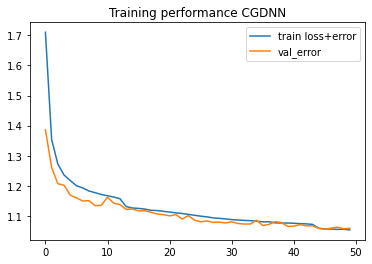

In [ ]:
### Loss graph 

plt.figure()
plt.title('Training performance CGDNN')
plt.plot(history.epoch, history.history['loss'], label='train loss+error')
plt.plot(history.epoch, history.history['val_loss'], label='val_error')
plt.legend()

In [ ]:
### Confusion matrix oluşturulması 
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

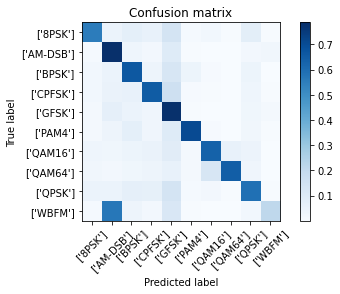

In [ ]:
### Plot confusion matrix
test_Y_hat = model_CGDNN.predict(X_test, batch_size=32)
conf = np.zeros([len(classes),len(classes)])
confnorm = np.zeros([len(classes),len(classes)])
for i in range(0,X_test.shape[0]):
    j = list(y_test[i,:]).index(1)
    k = int(np.argmax(test_Y_hat[i,:]))
    conf[j,k] = conf[j,k] + 1
for i in range(0,len(classes)):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
#figure(figsize=(10, 8)
plot_confusion_matrix(confnorm, labels=classes)

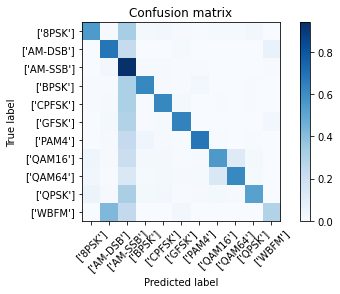

In [ ]:
### Plot confusion matrix
test_Y_hat = model_CGDNN.predict(X_test, batch_size=32)
conf = np.zeros([len(classes),len(classes)])
confnorm = np.zeros([len(classes),len(classes)])
for i in range(0,X_test.shape[0]):
    j = list(y_test[i,:]).index(1)
    k = int(np.argmax(test_Y_hat[i,:]))
    conf[j,k] = conf[j,k] + 1
for i in range(0,len(classes)):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
#figure(figsize=(10, 8)
plot_confusion_matrix(confnorm, labels=classes)

In [ ]:
temp = {}
lb = {}

for i in range(20):
    temp[-20 + (i *2)] = []
    lb[-20 + (i *2)] = []
    
for i in range(20):
    for j in range(11):
        arr = df[(classes[j][0] , (-20 + (i *2)))]
        for k in range(len(arr)) : temp [-20 + (i *2 )].append(arr[k])
        for k in range(len(df[classes[j][0], -20 + ( i*2)])): lb[-20 + (i*2)].append(classes[j][0])

Overall Accuracy:  0.0955
Overall Accuracy:  0.1015
Overall Accuracy:  0.0975
Overall Accuracy:  0.112
Overall Accuracy:  0.1445
Overall Accuracy:  0.268
Overall Accuracy:  0.415
Overall Accuracy:  0.565
Overall Accuracy:  0.7105
Overall Accuracy:  0.839
Overall Accuracy:  0.882
Overall Accuracy:  0.9095
Overall Accuracy:  0.916
Overall Accuracy:  0.9105
Overall Accuracy:  0.913
Overall Accuracy:  0.93
Overall Accuracy:  0.923
Overall Accuracy:  0.9325
Overall Accuracy:  0.9175
Overall Accuracy:  0.9065


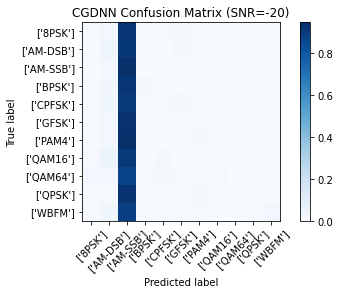

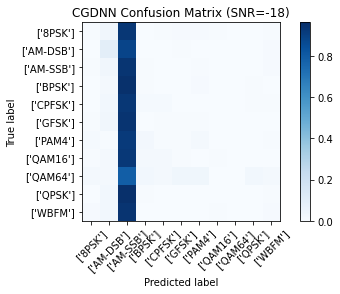

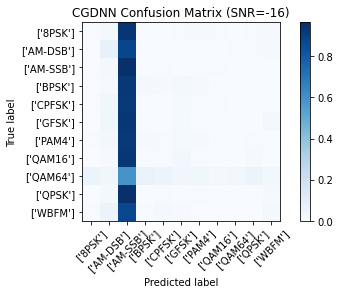

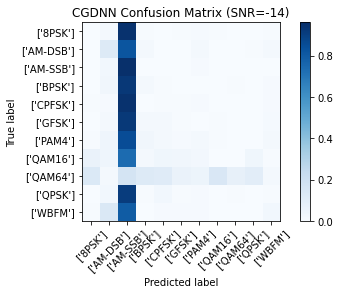

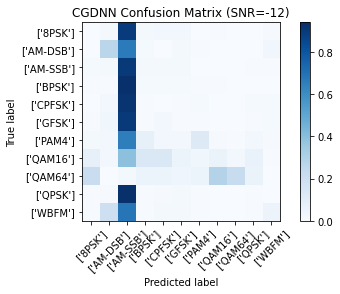

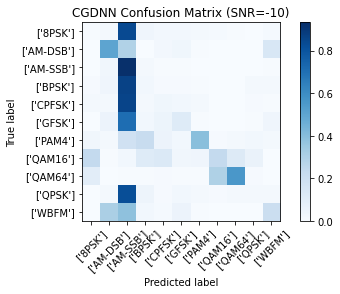

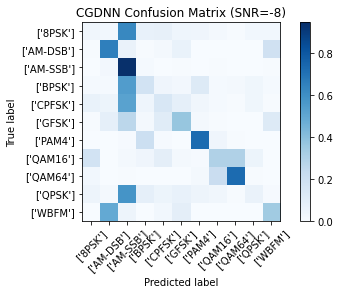

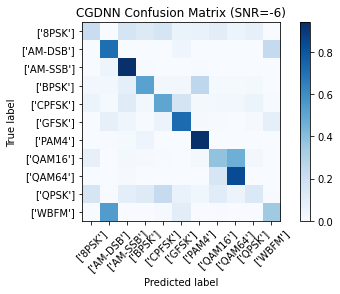

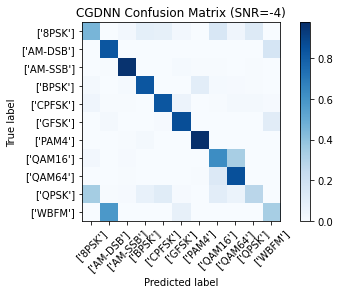

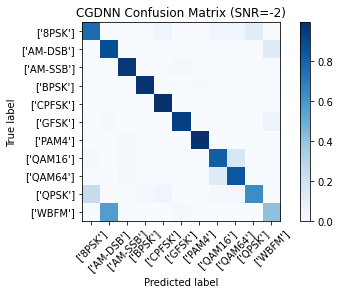

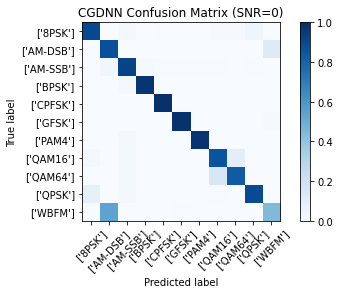

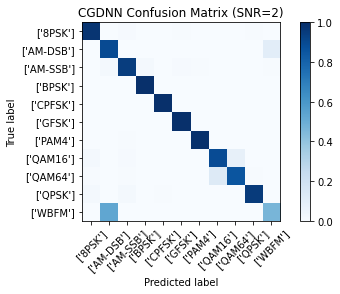

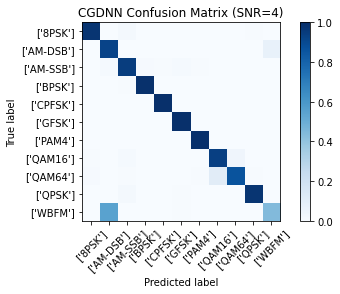

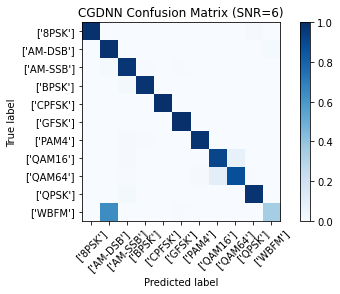

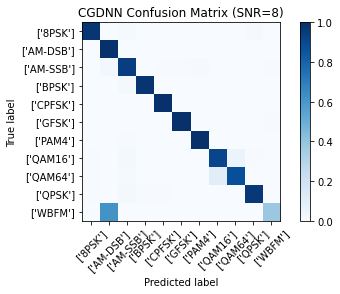

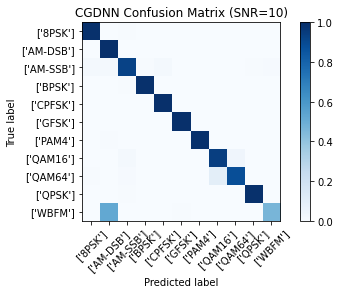

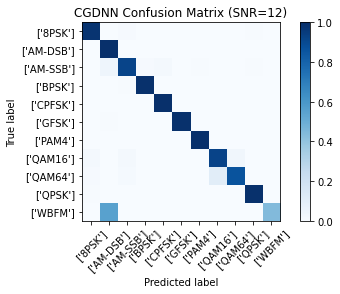

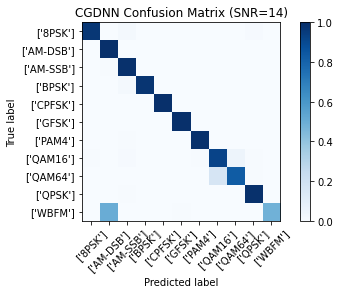

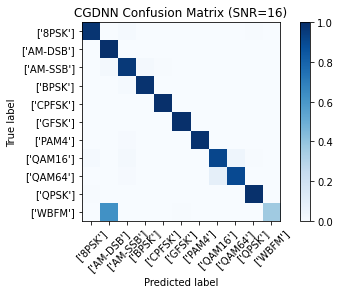

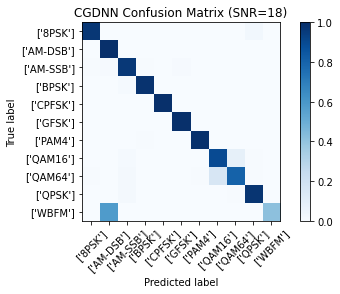

In [ ]:
acc = {}
snr = [-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

for snr in snrs:
    temp_np = np.array(temp[snr])
    lbl_np = np.array(lb[snr])
    
    #temp_np = temp_np.reshape(temp_np.shape[0], temp_np.shape[1], temp_np.shape[2], 1)
    lbl_np = lbl_np.reshape(lbl_np.shape[0], 1)
    
    temp_i = np.random.choice(temp_np.shape[0], 2000, replace = False)
    test_X_i = temp_np[temp_i]
    test_Y_i = lbl_np[temp_i]   
    
    test_Y_i = enc.transform(test_Y_i).toarray()

    test_X_i = np.transpose(test_X_i[:,:,:],(0,2,1))
    # estimate classes
    test_Y_i_hat = model_CGDNN.predict(test_X_i)
    conf = np.zeros([len(classes),len(classes)])
    confnorm = np.zeros([len(classes),len(classes)])
    for i in range(0,test_X_i.shape[0]):
        j = (test_Y_i[i,:].tolist()).index(1)
        k = int(np.argmax(test_Y_i_hat[i,:]))
        conf[j,k] = conf[j,k] + 1
    for i in range(0,len(classes)):
        confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
    plt.figure()
    plot_confusion_matrix(confnorm, labels=classes, title="CGDNN Confusion Matrix (SNR=%d)"%(snr))
    
    cor = np.sum(np.diag(conf))
    ncor = np.sum(conf) - cor
    print("Overall Accuracy: ", cor / (cor+ncor))
    acc[snr] = 1.0*cor/(cor+ncor)